# Dimensionality reduction with shogun

In [1]:
require 'shogun'
require 'csv'
require 'gnuplot'

true

In [2]:
csv = CSV.read("datasets/bezdekIris.data", { converters: [:float]})
obsmatrix = csv.transpose
labels = obsmatrix.pop
data = NArray.to_na(obsmatrix)

NArray.float(150,4): 
[ [ 5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, ... ], 
  [ 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3.0, ... ], 
  [ 1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, ... ], 
  [ 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, ... ] ]

In [3]:
train_features = Shogun::RealFeatures.new
train_features.set_feature_matrix(data)
preprocessor = Shogun::PCA.new
preprocessor.set_target_dim(2)
preprocessor.init(train_features)
e = preprocessor.get_transformation_matrix()

yn= preprocessor.apply_to_feature_matrix(train_features)

NArray.float(150,2): 
[ [ -0.319397, 0.177001, 0.144949, 0.318299, -0.326755, -0.74133, ... ], 
  [ -2.68413, -2.71414, -2.88899, -2.74534, -2.72872, -2.28086, ... ] ]

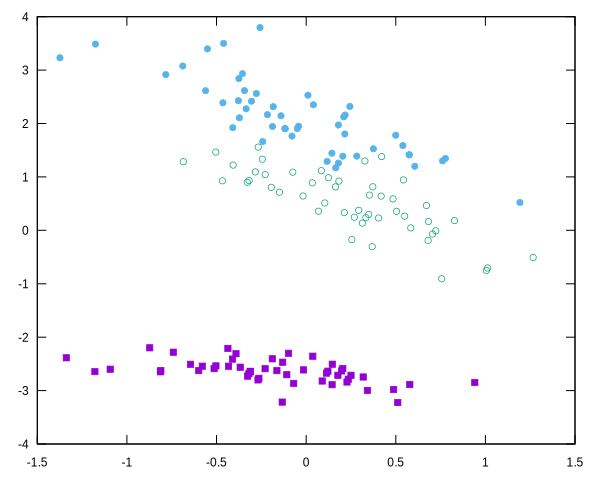

In [4]:
grouped = (yn.to_a << csv.transpose[4]).transpose.group_by{|dat| dat[2]}
Gnuplot::Plot.new do |plot|
  plot.data << Gnuplot::DataSet.new(grouped["Iris-setosa"].map{|dat| dat[0..1]}.transpose) do |ds|
    ds.with = "points pt 5 ps 0.7"
    ds.notitle
  end
  plot.data << Gnuplot::DataSet.new(grouped["Iris-versicolor"].map{|dat| dat[0..1]}.transpose) do |ds|
    ds.with = "points pt 6 ps 0.7"
    ds.notitle
  end
  plot.data << Gnuplot::DataSet.new(grouped["Iris-virginica"].map{|dat| dat[0..1]}.transpose) do |ds|
    ds.with = "points pt 7 ps 0.7"
    ds.notitle
  end
end